Student Details

Name: Fergus Mc Hale

ID: 18203485

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [63]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd

In [2]:
TARGET_ATTRIBUTE = '2'

# Task 4  (CE6002)
* Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin.
* This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

# Dataset 1

In [3]:
dataset_1 = pd.read_csv("./dataset_1.csv",index_col=0)

In [4]:
y1 = dataset_1[TARGET_ATTRIBUTE].values

X1 = dataset_1.drop(TARGET_ATTRIBUTE, axis=1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Dataset 2

In [5]:
dataset_2 = pd.read_csv("./dataset_2.csv",index_col=0)

In [6]:
y2 = dataset_2[TARGET_ATTRIBUTE].values

# predictor attributes
X2 = dataset_2.drop(TARGET_ATTRIBUTE, axis=1).values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# DataSet 3

In [7]:
dataset_3 = pd.read_csv("./dataset_3.csv",index_col=0)

In [8]:
y3 = dataset_3[TARGET_ATTRIBUTE].values

# predictor attributes
X3 = dataset_3.drop(TARGET_ATTRIBUTE, axis=1).values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [9]:
classifer_c01 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [.01]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c1 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [1]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c10 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [10]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c100 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [100]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c1000 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [1000]}, scoring='accuracy',cv=10, n_jobs=-1)

classifer_c01.fit(X1_train, y1_train)
classifer_c1.fit(X1_train, y1_train)
classifer_c10.fit(X1_train, y1_train)
classifer_c100.fit(X1_train, y1_train)
classifer_c1000.fit(X1_train, y1_train)

classifiers = [(classifer_c01, 'C = .01'),
               (classifer_c1, 'C = 1'),
               (classifer_c10, 'C = 10'),
               (classifer_c100, 'C = 100'),
               (classifer_c1000, 'C = 1,000')]

In [10]:
def get_eout(support_vector_size,number_of_training_samples):
    return support_vector_size/(number_of_training_samples -1)

In [11]:
def plot_classifier(clf, X_train,y_train,title=None):
    # plot the decision function
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    print('Total Support Vectors {0}'.format(len(clf.support_vectors_)))
    print('Training Samples {0}'.format(len(X_train)))
    print(clf.support_vectors_)
    expected_eout = get_eout(len(clf.support_vectors_),len(X_train))
    print('E-out {0}'.format(expected_eout))
    plt.show()

Total Support Vectors 1135
Training Samples 8000
[[-0.52177256  0.10862326]
 [-0.94427626 -0.87298394]
 [-0.77066232 -0.36226524]
 ...
 [ 0.27838381  0.3770125 ]
 [-0.25013495 -0.7048612 ]
 [ 0.21938779  0.42381155]]
E-out 0.14189273659207402


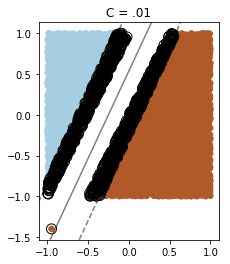

Total Support Vectors 23
Training Samples 8000
[[-0.26191636  0.47782806]
 [-0.27611848  0.45161241]
 [-0.72312564 -0.44140172]
 [-0.66478518 -0.32579898]
 [-0.13321589  0.73438384]
 [-0.41876949  0.16350114]
 [-0.27486548  0.45362456]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.78974925 -0.57527146]
 [-0.34715894  0.30941224]
 [-0.98792723 -0.97230995]
 [ 0.01339543  0.02530265]
 [ 0.16721063  0.33260922]
 [ 0.26596053  0.53110191]
 [ 0.31305328  0.62450954]
 [-0.16191698 -0.32500711]
 [ 0.33605953  0.67044617]
 [-0.48112241 -0.96240371]
 [-0.13394844 -0.2682658 ]
 [ 0.23727031  0.47271164]
 [-0.95       -1.4       ]
 [-0.15099686 -0.30310408]]
E-out 0.002875359419927491


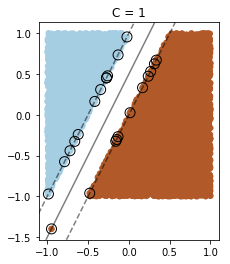

Total Support Vectors 5
Training Samples 8000
[[-0.41876949  0.16350114]
 [-0.78974925 -0.57527146]
 [-0.98792723 -0.97230995]
 [ 0.26596053  0.53110191]
 [-0.95       -1.4       ]]
E-out 0.0006250781347668458


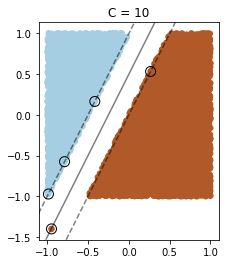

Total Support Vectors 3
Training Samples 8000
[[-0.98792723 -0.97230995]
 [ 0.48618039  0.95383955]
 [-0.95       -1.4       ]]
E-out 0.00037504688086010754


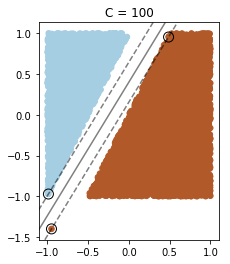

Total Support Vectors 3
Training Samples 8000
[[-0.98792723 -0.97230995]
 [ 0.48618039  0.95383955]
 [-0.95       -1.4       ]]
E-out 0.00037504688086010754


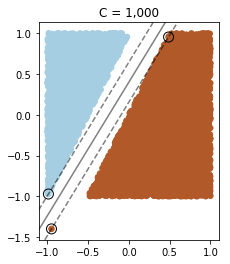

In [12]:
for classifier in classifiers:
    plot_classifier(classifier[0].best_estimator_, X1_train, y1_train,classifier[1])

Total Support Vectors 1135
Training Samples 2001
[[-0.52177256  0.10862326]
 [-0.94427626 -0.87298394]
 [-0.77066232 -0.36226524]
 ...
 [ 0.27838381  0.3770125 ]
 [-0.25013495 -0.7048612 ]
 [ 0.21938779  0.42381155]]
E-out 0.5675


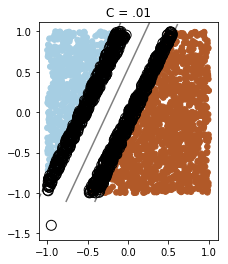

Total Support Vectors 23
Training Samples 2001
[[-0.26191636  0.47782806]
 [-0.27611848  0.45161241]
 [-0.72312564 -0.44140172]
 [-0.66478518 -0.32579898]
 [-0.13321589  0.73438384]
 [-0.41876949  0.16350114]
 [-0.27486548  0.45362456]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.78974925 -0.57527146]
 [-0.34715894  0.30941224]
 [-0.98792723 -0.97230995]
 [ 0.01339543  0.02530265]
 [ 0.16721063  0.33260922]
 [ 0.26596053  0.53110191]
 [ 0.31305328  0.62450954]
 [-0.16191698 -0.32500711]
 [ 0.33605953  0.67044617]
 [-0.48112241 -0.96240371]
 [-0.13394844 -0.2682658 ]
 [ 0.23727031  0.47271164]
 [-0.95       -1.4       ]
 [-0.15099686 -0.30310408]]
E-out 0.0115


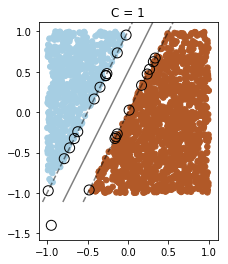

Total Support Vectors 5
Training Samples 2001
[[-0.41876949  0.16350114]
 [-0.78974925 -0.57527146]
 [-0.98792723 -0.97230995]
 [ 0.26596053  0.53110191]
 [-0.95       -1.4       ]]
E-out 0.0025


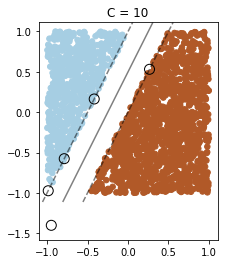

Total Support Vectors 3
Training Samples 2001
[[-0.98792723 -0.97230995]
 [ 0.48618039  0.95383955]
 [-0.95       -1.4       ]]
E-out 0.0015


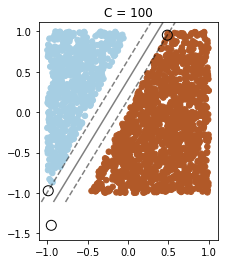

Total Support Vectors 3
Training Samples 2001
[[-0.98792723 -0.97230995]
 [ 0.48618039  0.95383955]
 [-0.95       -1.4       ]]
E-out 0.0015


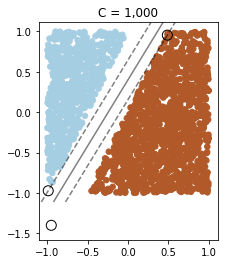

In [13]:
for classifier in classifiers:
    plot_classifier(classifier[0].best_estimator_, X1_test, y1_test,classifier[1])

# Task 5  (CE6002)
* Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.
* This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 
* For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

In [14]:
PARAMATERS = [{'kernel': ['linear','rbf','sigmoid'],'C': [1, 10, 100], 'gamma': [0.001, 0.0001,1,10,"auto"]}]

In [15]:
def grid_search_CV_optimal_svm(X_train,y_train):
    clf = GridSearchCV(svm.SVC(), PARAMATERS, scoring='accuracy', cv=10, n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Grid Search : Best SVM classifier parameters:\n", clf.best_params_)
    print("Grid Search :Best CV score :", clf.best_score_)
    return clf    

In [16]:
def random_search_CV_optimal_svm(X_train,y_train,n_iter_search):
    
    param_dist = {"kernel": ['linear','rbf','sigmoid'],
              "C": [1, 10, 100] ,
              "gamma": [0.001, 0.0001,1,10,"auto"] }
    
    random_search = RandomizedSearchCV(svm.SVC(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
    random_search.fit(X_train, y_train)
    print("Random : Best SVM classifier parameters:\n", random_search.best_params_)
    print("Random : Best CV score :", random_search.best_score_)
    return random_search

# Dataset 1

(8000, 2) (8000,)


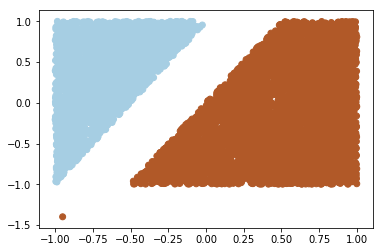

In [17]:
print(X1_train.shape, y1_train.shape)
plt.figure()
plt.scatter(X1_train[:,0], X1_train[:,1], c=y1_train, cmap=plt.cm.Paired)
plt.show()

In [18]:
clf_ds1_train_grid = grid_search_CV_optimal_svm(X1_train,y1_train)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Grid Search :Best CV score : 1.0


In [19]:
clf_ds1_train_random = random_search_CV_optimal_svm(X1_train,y1_train,20)

Random : Best SVM classifier parameters:
 {'kernel': 'linear', 'gamma': 0.001, 'C': 100}
Random : Best CV score : 1.0


In [20]:
def plot_classifier2(clf, X_train, y_train, title = ''):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    print(str(clf.best_params_))
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    print('Total Support Vectors {0}'.format(len(clf.best_estimator_.support_vectors_)))
    print('Training Samples {0}'.format(len(X1_train)))
    print(clf.best_estimator_.support_vectors_)
    expected_eout = get_eout(len(clf.best_estimator_.support_vectors_),len(X1_train))
    print('E-out {0}'.format(expected_eout))
    plt.show()

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Total Support Vectors 99
Training Samples 8000
[[-0.26191636  0.47782806]
 [-0.68969656  0.36085778]
 [-0.70705569  0.33608921]
 [-0.99903759  0.16565801]
 [-0.70885844  0.3598165 ]
 [-0.99963521 -0.20566288]
 [-0.62438697  0.61238316]
 [-0.63234573  0.62240371]
 [-0.4465885   0.99986676]
 [-0.99246525  0.59834809]
 [-0.60231696  0.99693046]
 [-0.13321589  0.73438384]
 [-0.41876949  0.16350114]
 [-0.51379303 -0.02131316]
 [-0.99731631  0.5190683 ]
 [-0.99166324 -0.50837137]
 [-0.99773233  0.01142238]
 [-0.99495972 -0.96565037]
 [-0.984609    0.99990065]
 [-0.62230156 -0.24152621]
 [-0.02413072  0.95493771]
 [-0.69154132  0.38895216]
 [-0.78974925 -0.57527146]
 [-0.53105313 -0.05497864]
 [-0.0402588   0.92781312]
 [-0.21708216  0.58175838]
 [-0.34715894  0.30941224]
 [-0.63790717  0.59643978]
 [-0.99895698  0.39389779]
 [-0.98792723 -0.97230995]
 [ 0.01339543  0.02530265]
 [ 0.61759893  0.27595812]
 [ 0.59529887 -0.57070816]
 [ 0.59699403  0.195254

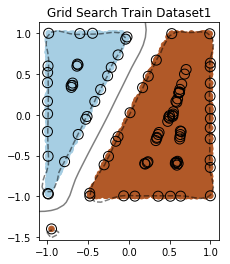

In [21]:
plot_classifier2(clf_ds1_train_grid,X1_train,y1_train,'Grid Search Train Dataset1')

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}
Total Support Vectors 3
Training Samples 8000
[[-0.98792723 -0.97230995]
 [ 0.48618039  0.95383955]
 [-0.95       -1.4       ]]
E-out 0.00037504688086010754


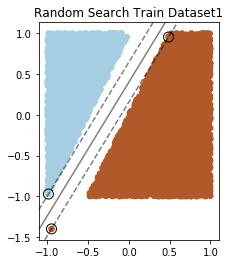

In [22]:
plot_classifier2(clf_ds1_train_random,X1_train,y1_train,'Random Search Train Dataset1')

In [23]:
clf_ds1_test_grid = grid_search_CV_optimal_svm(X1_test,y1_test)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Grid Search :Best CV score : 1.0


{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Total Support Vectors 21
Training Samples 8000
[[-0.0988021   0.82709126]
 [-0.83928299 -0.67750844]
 [-0.8057124  -0.60458818]
 [-0.77387613 -0.54486202]
 [-0.93348183 -0.86618848]
 [-0.30407569  0.41348949]
 [-0.12588847  0.76178227]
 [-0.20030668  0.62219157]
 [-0.79335087 -0.58055959]
 [-0.56925863 -0.13273605]
 [-0.57487064 -0.14323181]
 [-0.06946677 -0.14485639]
 [-0.14122503 -0.28892083]
 [-0.23817275 -0.48879385]
 [-0.36193869 -0.74102127]
 [-0.28379043 -0.5705029 ]
 [ 0.12003331  0.23293166]
 [-0.16480347 -0.33885515]
 [-0.36040086 -0.73816591]
 [ 0.03128179  0.05807501]
 [ 0.17921653  0.35492434]]
E-out 0.0026253281660207524


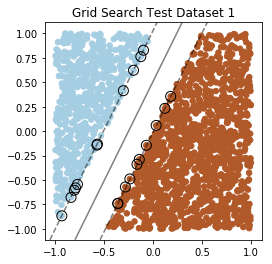

In [24]:
plot_classifier2(clf_ds1_test_grid,X1_test,y1_test,'Grid Search Test Dataset 1')

In [25]:
clf_ds1_test_random = random_search_CV_optimal_svm(X1_test,y1_test,20)

Random : Best SVM classifier parameters:
 {'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 100}
Random : Best CV score : 1.0


{'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 100}
Total Support Vectors 641
Training Samples 8000
[[-0.80022477 -0.46370987]
 [-0.43144124  0.69178695]
 [-0.79602652 -0.53684204]
 ...
 [-0.0686029  -0.24792102]
 [-0.36073294 -0.86412674]
 [ 0.09582552  0.1534656 ]]
E-out 0.08013501687710964


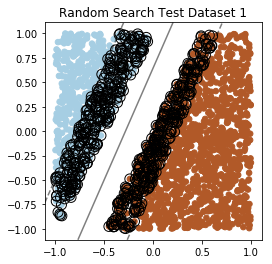

In [26]:
plot_classifier2(clf_ds1_test_random,X1_test,y1_test,'Random Search Test Dataset 1')

# Dataset 2

(8000, 2) (8000,)


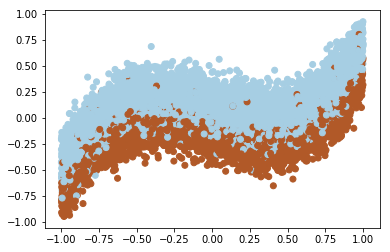

In [27]:
print(X2_train.shape, y2_train.shape)
plt.figure()
plt.scatter(X2_train[:,0], X2_train[:,1], c=y2_train, cmap=plt.cm.Paired)
plt.show()

In [28]:
clf_ds2_train_grid = grid_search_CV_optimal_svm(X2_train,y2_train)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.865625


In [29]:
clf_ds2_train_random = random_search_CV_optimal_svm(X2_train,y2_train,20)

Random : Best SVM classifier parameters:
 {'kernel': 'rbf', 'gamma': 10, 'C': 1}
Random : Best CV score : 0.866


{'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Total Support Vectors 2474
Training Samples 8000
[[-0.19145994 -0.02928284]
 [-0.78354288 -0.25264186]
 [ 0.43521837 -0.35487807]
 ...
 [-0.38338885 -0.04712923]
 [-0.98604925 -0.68691022]
 [-0.74547482 -0.11228036]]
E-out 0.3092886610826353


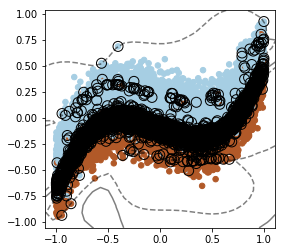

In [30]:
plot_classifier2(clf_ds2_train_grid,X2_train,y2_train)

{'kernel': 'rbf', 'gamma': 10, 'C': 1}
Total Support Vectors 2582
Training Samples 8000
[[-0.19145994 -0.02928284]
 [-0.78354288 -0.25264186]
 [ 0.43521837 -0.35487807]
 ...
 [-0.38338885 -0.04712923]
 [-0.98604925 -0.68691022]
 [-0.74547482 -0.11228036]]
E-out 0.3227903487935992


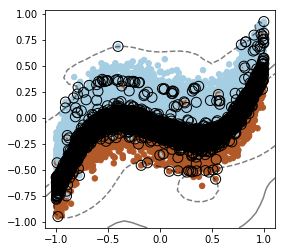

In [31]:
plot_classifier2(clf_ds2_train_random,X2_train,y2_train)

In [32]:
clf_ds2_test_grid = grid_search_CV_optimal_svm(X2_test,y2_test)

Grid Search : Best SVM classifier parameters:
 {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.8715


In [33]:
clf_ds2_test_random = random_search_CV_optimal_svm(X2_test,y2_test,20)

Random : Best SVM classifier parameters:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Random : Best CV score : 0.867


{'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Total Support Vectors 631
Training Samples 8000
[[ 0.89146835  0.75082684]
 [ 0.75304688  0.08108139]
 [-0.39361869 -0.05108413]
 ...
 [-0.47257724  0.02257728]
 [-0.17693336 -0.06902673]
 [-0.65936344 -0.22538064]]
E-out 0.07888486060757595


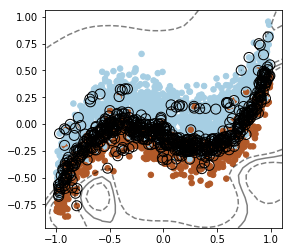

In [34]:
plot_classifier2(clf_ds2_test_grid,X2_test,y2_test)

{'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Total Support Vectors 758
Training Samples 8000
[[ 0.44643713 -0.10897993]
 [ 0.75304688  0.08108139]
 [-0.39361869 -0.05108413]
 ...
 [ 0.91943875  0.19407336]
 [-0.17693336 -0.06902673]
 [-0.65936344 -0.22538064]]
E-out 0.09476184523065383


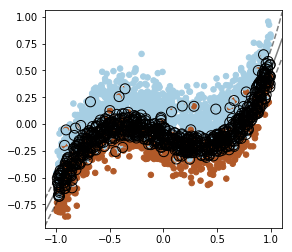

In [35]:
plot_classifier2(clf_ds2_test_random,X2_test,y2_test)

# Dataset 3

(8000, 2) (8000,)


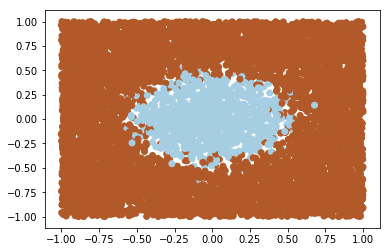

In [36]:
print(X3_train.shape, y3_train.shape)
plt.figure()
plt.scatter(X3_train[:,0], X3_train[:,1], c=y3_train, cmap=plt.cm.Paired)
plt.show()

In [37]:
clf_ds3_train_grid = grid_search_CV_optimal_svm(X3_train,y3_train)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.987625


In [38]:
clf_ds3_train_random = random_search_CV_optimal_svm(X3_train,y3_train,20)

Random : Best SVM classifier parameters:
 {'kernel': 'rbf', 'gamma': 10, 'C': 1}
Random : Best CV score : 0.987625


{'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Total Support Vectors 335
Training Samples 8000
[[-2.02272027e-01 -3.62237813e-01]
 [ 1.62630193e-01 -3.48730854e-01]
 [-3.95167795e-01 -2.37295125e-01]
 [-2.82461264e-01 -4.91401458e-01]
 [-1.78512415e-01  4.03407433e-01]
 [ 4.29883882e-01  1.70922151e-01]
 [ 2.38919273e-01  3.44352520e-01]
 [-5.57980199e-02 -4.48298885e-01]
 [ 2.96206992e-01 -3.23305302e-01]
 [-3.03547622e-01  3.18921559e-01]
 [-5.02877442e-01  1.11986757e-01]
 [ 5.19693137e-01 -9.56628445e-03]
 [ 5.21905703e-01 -1.02374622e-01]
 [-1.79073046e-01 -4.31433271e-01]
 [ 3.13697012e-01  3.93869625e-01]
 [ 4.94279571e-01 -5.55747033e-02]
 [ 1.68925037e-01  3.53932887e-01]
 [ 1.18637461e-01 -3.98751367e-01]
 [ 4.46949304e-02  3.92229648e-01]
 [-8.76032563e-02  4.78553530e-01]
 [-4.70241824e-01  2.40929020e-03]
 [ 5.02348120e-01  1.90223692e-01]
 [ 3.80974143e-01  2.67739211e-01]
 [-3.57891030e-01 -4.18641293e-01]
 [-1.00469846e-02 -3.80219996e-01]
 [ 3.88348536e-01  4.47700879e-01]
 [-

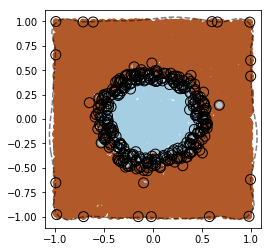

In [39]:
plot_classifier2(clf_ds3_train_grid,X3_train,y3_train)

{'kernel': 'rbf', 'gamma': 10, 'C': 1}
Total Support Vectors 335
Training Samples 8000
[[-2.02272027e-01 -3.62237813e-01]
 [ 1.62630193e-01 -3.48730854e-01]
 [-3.95167795e-01 -2.37295125e-01]
 [-2.82461264e-01 -4.91401458e-01]
 [-1.78512415e-01  4.03407433e-01]
 [ 4.29883882e-01  1.70922151e-01]
 [ 2.38919273e-01  3.44352520e-01]
 [-5.57980199e-02 -4.48298885e-01]
 [ 2.96206992e-01 -3.23305302e-01]
 [-3.03547622e-01  3.18921559e-01]
 [-5.02877442e-01  1.11986757e-01]
 [ 5.19693137e-01 -9.56628445e-03]
 [ 5.21905703e-01 -1.02374622e-01]
 [-1.79073046e-01 -4.31433271e-01]
 [ 3.13697012e-01  3.93869625e-01]
 [ 4.94279571e-01 -5.55747033e-02]
 [ 1.68925037e-01  3.53932887e-01]
 [ 1.18637461e-01 -3.98751367e-01]
 [ 4.46949304e-02  3.92229648e-01]
 [-8.76032563e-02  4.78553530e-01]
 [-4.70241824e-01  2.40929020e-03]
 [ 5.02348120e-01  1.90223692e-01]
 [ 3.80974143e-01  2.67739211e-01]
 [-3.57891030e-01 -4.18641293e-01]
 [-1.00469846e-02 -3.80219996e-01]
 [ 3.88348536e-01  4.47700879e-01]
 [-

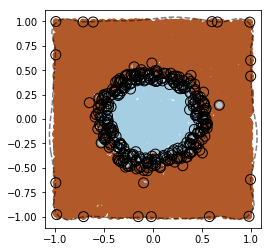

In [40]:
plot_classifier2(clf_ds3_train_random,X3_train,y3_train)

In [41]:
clf_ds3_test_grid = grid_search_CV_optimal_svm(X3_test,y3_test)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.9875


In [42]:
clf_ds3_test_random = random_search_CV_optimal_svm(X3_train,y3_train,20)

Random : Best SVM classifier parameters:
 {'kernel': 'rbf', 'gamma': 10, 'C': 1}
Random : Best CV score : 0.987625


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Total Support Vectors 162
Training Samples 8000
[[ 0.03792597 -0.37718649]
 [-0.38175272 -0.04937899]
 [ 0.09186315 -0.3357181 ]
 [ 0.36335469 -0.2051127 ]
 [ 0.1897281   0.31184945]
 [ 0.42567936  0.19370804]
 [ 0.16785146  0.37743853]
 [-0.25167571  0.24372918]
 [-0.43409237 -0.03825495]
 [-0.30942336 -0.17795087]
 [-0.06689438 -0.46938714]
 [ 0.16167535 -0.32416269]
 [ 0.30001938  0.29559316]
 [ 0.26024579  0.28149121]
 [ 0.37423132 -0.22113348]
 [ 0.32051187 -0.52126589]
 [-0.0602173  -0.32628554]
 [ 0.13181793 -0.31844287]
 [ 0.38763663  0.29082098]
 [ 0.00992627  0.36580026]
 [ 0.04110525  0.38869467]
 [-0.18656451  0.30475795]
 [ 0.25115701  0.3175002 ]
 [-0.31191475 -0.19404767]
 [-0.40452353  0.18089837]
 [ 0.31350937 -0.26972414]
 [-0.29095095 -0.19933403]
 [-0.09571832  0.35584019]
 [ 0.12700807 -0.40731799]
 [ 0.36761843 -0.12855143]
 [-0.27485939 -0.33621575]
 [ 0.46598327 -0.11540181]
 [ 0.47515229  0.26262791]
 [ 0.33528069  0.207324

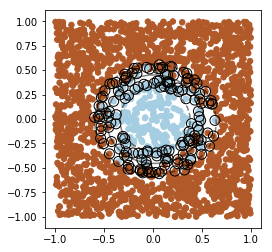

In [43]:
plot_classifier2(clf_ds3_test_grid,X3_test,y3_test)

{'kernel': 'rbf', 'gamma': 10, 'C': 1}
Total Support Vectors 335
Training Samples 8000
[[-2.02272027e-01 -3.62237813e-01]
 [ 1.62630193e-01 -3.48730854e-01]
 [-3.95167795e-01 -2.37295125e-01]
 [-2.82461264e-01 -4.91401458e-01]
 [-1.78512415e-01  4.03407433e-01]
 [ 4.29883882e-01  1.70922151e-01]
 [ 2.38919273e-01  3.44352520e-01]
 [-5.57980199e-02 -4.48298885e-01]
 [ 2.96206992e-01 -3.23305302e-01]
 [-3.03547622e-01  3.18921559e-01]
 [-5.02877442e-01  1.11986757e-01]
 [ 5.19693137e-01 -9.56628445e-03]
 [ 5.21905703e-01 -1.02374622e-01]
 [-1.79073046e-01 -4.31433271e-01]
 [ 3.13697012e-01  3.93869625e-01]
 [ 4.94279571e-01 -5.55747033e-02]
 [ 1.68925037e-01  3.53932887e-01]
 [ 1.18637461e-01 -3.98751367e-01]
 [ 4.46949304e-02  3.92229648e-01]
 [-8.76032563e-02  4.78553530e-01]
 [-4.70241824e-01  2.40929020e-03]
 [ 5.02348120e-01  1.90223692e-01]
 [ 3.80974143e-01  2.67739211e-01]
 [-3.57891030e-01 -4.18641293e-01]
 [-1.00469846e-02 -3.80219996e-01]
 [ 3.88348536e-01  4.47700879e-01]
 [-

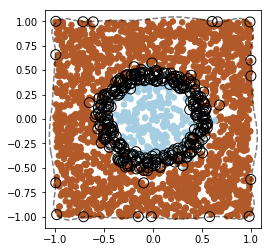

In [44]:
plot_classifier2(clf_ds3_test_random,X3_test,y3_test)

# Example Dataset

In [112]:
X4 = X2[40:55]
print('x4 {0}'.format(X4.shape))
y4 = y3[60:75]
print('y4 {0}'.format(y4.shape))

x4 (15, 2)
y4 (15,)


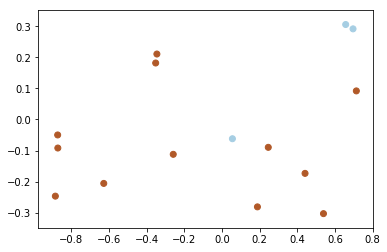

In [113]:
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.Paired)

In [114]:
example_ds_grid = grid_search_CV_optimal_svm(X4,y4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Grid Search : Best SVM classifier parameters:
 {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Grid Search :Best CV score : 0.8666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Total Support Vectors 5
Training Samples 8000
[[ 0.05519511 -0.06203245]
 [ 0.65652575  0.30619456]
 [-0.34578319  0.21107692]
 [ 0.44076216 -0.17375055]
 [ 0.71309497  0.0921555 ]]
E-out 0.0006250781347668458


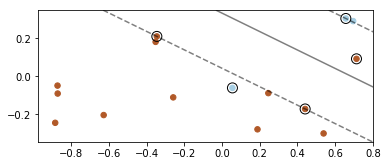

In [115]:
plot_classifier2(example_ds_grid,X4,y4)

In [120]:
example_ds_random = random_search_CV_optimal_svm(X4,y4,1)

Random : Best SVM classifier parameters:
 {'kernel': 'linear', 'gamma': 'auto', 'C': 100}
Random : Best CV score : 0.8666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'kernel': 'linear', 'gamma': 'auto', 'C': 100}
Total Support Vectors 5
Training Samples 8000
[[ 0.05519511 -0.06203245]
 [ 0.65652575  0.30619456]
 [-0.34578319  0.21107692]
 [ 0.44076216 -0.17375055]
 [ 0.71309497  0.0921555 ]]
E-out 0.0006250781347668458


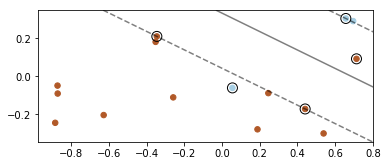

In [123]:
plot_classifier2(example_ds_random,X4,y4)